<a href="https://colab.research.google.com/github/Ravitha/BIP-Laboratory/blob/master/Hand_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Recognition**
1. Reading Images

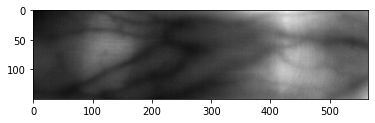

In [291]:
from skimage.io import imread
from matplotlib import pyplot as plt
I = imread('/content/029_L_2.png')
plt.imshow(I, cmap='gray')
plt.show()

2. Apply Histogram


In [0]:
def apply_hist(I, filter_size):
  I1 = I
  [m,n]= I.shape
  M = np.mean(I)
  m1 = (int)((filter_size-1)/2)
  I2 = np.zeros((m+filter_size-1, n+filter_size-1))
  I2[m1:(m+filter_size-1)-m1,m1:((n+filter_size-1))-m1] =I 
  for i in range(m):
    for j in range(n):
      z = i+m1
      k = j+m1
      ne = I2[z-m1:z+m1+1, k-m1:k+m1+1]
      m = np.mean(ne)
      s = np.std(ne)
      I1[i][j] = (M/s)*(I[i][j]-m)+m
  return I1

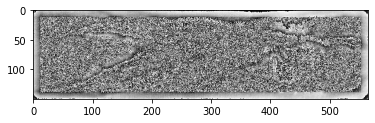

In [295]:
I1 = apply_hist(I, 25)
plt.imshow(I1, cmap='gray')

3. Binary Thresholding

122


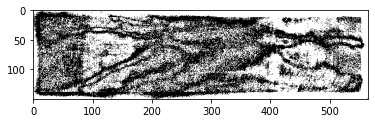

In [245]:
from skimage.filters import threshold_otsu
import numpy as np

Thres = threshold_otsu(I1)
binary = I1 > Thres
print(Thres)
plt.imshow(binary, cmap='gray')

4. Post processing

In [0]:
from skimage import morphology
binary = 255-binary
binary = morphology.area_opening(binary, area_threshold=9, connectivity=1, parent=None, tree_traverser=None)

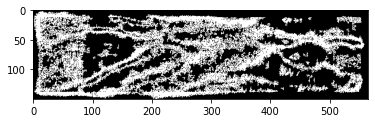

In [248]:
plt.imshow(binary,cmap='gray')

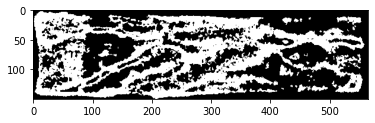

In [249]:
from skimage.filters import median
binary= median(binary)
plt.imshow(binary,cmap='gray')

5. Skeletonization

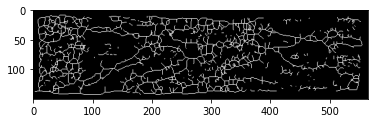

In [250]:
from skimage.morphology import skeletonize
binary = binary/255
binary = skeletonize(binary)

plt.imshow(binary,cmap='gray')

6. Detect Minutiae

In [0]:
mask = np.array([[0,0,0],[0,1,1],[0,0,0]])
mask = mask==1

In [0]:
x,y = np.where(binary==1)

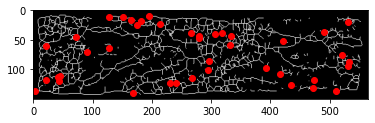

In [290]:
plt.imshow(binary, cmap='gray')
for i in range(x.shape[0]):
  val = binary[x[i]-1:x[i]+2,y[i]-1:y[i]+2]
  s = np.sum(val==mask)
  if(s==9):
    plt.plot(y[i],x[i],'ro')
plt.show()